In [2]:
!pip install pandas

In [3]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib as plt
from collections import Counter

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

import pandas as pd

In [4]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [5]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [6]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)

In [7]:
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.240018682528055,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.161078184368767,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.994024173345965,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.990207438765662,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.950842025167566,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Красавица и чудовище],...",8.016648094876867,"Gary Trousdale (dir.), Paige O'Hara, Robby Benson",/title/tt0101414/
246,"[\n 247.\n , [Ганди], \n, [(1982)], \n]",8.015130691505567,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.014456514245671,"Tate Taylor (dir.), Emma Stone, Viola Davis",/title/tt1454029/
248,"[\n 249.\n , [Служанка], \n, [(2016)...",8.012945033651798,"Park Chan-wook (dir.), Kim Min-hee, Ha Jung-woo",/title/tt4016934/


In [8]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [9]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [10]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [11]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.240018682528055,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.161078184368767,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.994024173345965,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.990207438765662,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.950842025167566,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [12]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

# ЗАДАЧА 1

In [13]:
data_without_dir = data["crew"].str.replace("\(dir.\)", "", regex=True)

In [14]:
crew_list = data_without_dir.tolist()

In [15]:
crew_list_split = ", ".join(crew_list).split (", ")

In [16]:
def get_unique_numbers(crew_list_split):
    list_of_unique_numbers = []
    unique_numbers = set(crew_list_split)

    for number in unique_numbers:
        list_of_unique_numbers.append(number)

    return list_of_unique_numbers

In [17]:
print(get_unique_numbers(crew_list_split))

['Tatsuya Nakadai', 'Graham Chapman', 'Anthony Hopkins', 'Darren Aronofsky ', 'Terry George ', 'Mel Gibson ', 'Yoo Ji-Tae', 'Eijirô Tôno', 'Jay Baruchel', 'Paul Newman', 'Ellen Widmann', 'Wilford Brimley', 'Bill Hader', 'Ron Clements ', 'Janet Leigh', 'Tom Berenger', 'Enzo Cannavale', 'Sidney Lumet ', 'Tim Robbins', 'John Carpenter ', 'François Cluzet', 'Dana Andrews', 'Timothée Chalamet', 'Leila Hatami', 'Amy Poehler', 'Brie Larson', 'Eva Marie Saint', 'Kang-ho Song', 'Craig T. Nelson', 'Matthew Modine', 'Peter Farrelly ', 'Mel Gibson', 'Joseph Gordon-Levitt', 'Jean-Pierre Jeunet ', 'Bruce Willis', 'Juan José Campanella ', 'Sylvester Stallone', 'T.J. Gnanavel ', "Gavin O'Connor ", 'Andrew Garfield', 'John Lasseter ', 'Judy Garland', 'Ewan McGregor', 'Liv Ullmann', 'Faye Dunaway', 'Michel Gondry ', 'Vittorio De Sica ', 'Haley Joel Osment', 'Darsheel Safary', 'Shelley Duvall', 'Suriya', 'Keir Dullea', 'James Woods', 'Ray Milland', 'Majid Majidi ', 'Çetin Tekindor', 'Christopher Nolan ',

# ЗАДАЧА 2

In [18]:
crew_list = data["crew"].tolist()
crew_list_split = ", ".join(crew_list).split(", ")

In [19]:
crew_list_split

['Frank Darabont (dir.)',
 'Tim Robbins',
 'Morgan Freeman',
 'Francis Ford Coppola (dir.)',
 'Marlon Brando',
 'Al Pacino',
 'Christopher Nolan (dir.)',
 'Christian Bale',
 'Heath Ledger',
 'Francis Ford Coppola (dir.)',
 'Al Pacino',
 'Robert De Niro',
 'Sidney Lumet (dir.)',
 'Henry Fonda',
 'Lee J. Cobb',
 'Steven Spielberg (dir.)',
 'Liam Neeson',
 'Ralph Fiennes',
 'Peter Jackson (dir.)',
 'Elijah Wood',
 'Viggo Mortensen',
 'Quentin Tarantino (dir.)',
 'John Travolta',
 'Uma Thurman',
 'Peter Jackson (dir.)',
 'Elijah Wood',
 'Ian McKellen',
 'Sergio Leone (dir.)',
 'Clint Eastwood',
 'Eli Wallach',
 'Robert Zemeckis (dir.)',
 'Tom Hanks',
 'Robin Wright',
 'David Fincher (dir.)',
 'Brad Pitt',
 'Edward Norton',
 'Christopher Nolan (dir.)',
 'Leonardo DiCaprio',
 'Joseph Gordon-Levitt',
 'Peter Jackson (dir.)',
 'Elijah Wood',
 'Ian McKellen',
 'Irvin Kershner (dir.)',
 'Mark Hamill',
 'Harrison Ford',
 'Lana Wachowski (dir.)',
 'Keanu Reeves',
 'Laurence Fishburne',
 'Martin Sc

In [20]:
directors = (re.findall(r"\b[A-Za-z ]*.?\(\b", str(crew_list_split)))

In [42]:
all_dirs_list = sorted([(k, v) for k, v in all_dirs.items()], key=lambda x: -x[1])
print(all_dirs_list)

[('Christopher Nolan (dir.)', 7), ('Steven Spielberg (dir.)', 7), ('Martin Scorsese (dir.)', 7), ('Akira Kurosawa (dir.)', 7), ('Stanley Kubrick (dir.)', 7), ('Alfred Hitchcock (dir.)', 6), ('Quentin Tarantino (dir.)', 5), ('Charles Chaplin (dir.)', 5), ('Billy Wilder (dir.)', 5), ('Sergio Leone (dir.)', 4), ('Hayao Miyazaki (dir.)', 4), ('Francis Ford Coppola (dir.)', 3), ('Peter Jackson (dir.)', 3), ('David Fincher (dir.)', 3), ('Frank Capra (dir.)', 3), ('James Cameron (dir.)', 3), ('Ridley Scott (dir.)', 3), ('Pete Docter (dir.)', 3), ('Denis Villeneuve (dir.)', 3), ('Clint Eastwood (dir.)', 3), ('Ingmar Bergman (dir.)', 3), ('Frank Darabont (dir.)', 2), ('Sidney Lumet (dir.)', 2), ('Robert Zemeckis (dir.)', 2), ('Milos Forman (dir.)', 2), ('Roman Polanski (dir.)', 2), ('Bong Joon Ho (dir.)', 2), ('Andrew Stanton (dir.)', 2), ('Anthony Russo (dir.)', 2), ('Sam Mendes (dir.)', 2), ('Park Chan-wook (dir.)', 2), ('Mel Gibson (dir.)', 2), ('Lee Unkrich (dir.)', 2), ('David Lean (dir.)'

In [43]:
directors = [x[0] for x in all_dirs_list[:20]]
number_of_films = [x[1] for x in all_dirs_list[:20]]

In [44]:
print(directors)
print(number_of_films)

['Christopher Nolan (dir.)', 'Steven Spielberg (dir.)', 'Martin Scorsese (dir.)', 'Akira Kurosawa (dir.)', 'Stanley Kubrick (dir.)', 'Alfred Hitchcock (dir.)', 'Quentin Tarantino (dir.)', 'Charles Chaplin (dir.)', 'Billy Wilder (dir.)', 'Sergio Leone (dir.)', 'Hayao Miyazaki (dir.)', 'Francis Ford Coppola (dir.)', 'Peter Jackson (dir.)', 'David Fincher (dir.)', 'Frank Capra (dir.)', 'James Cameron (dir.)', 'Ridley Scott (dir.)', 'Pete Docter (dir.)', 'Denis Villeneuve (dir.)', 'Clint Eastwood (dir.)']
[7, 7, 7, 7, 7, 6, 5, 5, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [45]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import numpy as np

def save(name='', fmt='png'):
    pwd = os.getcwd()
    iPath = './pictures/{}'.format(fmt)
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()
    
import matplotlib as mpl

In [46]:
print ('Current version on matplotlib library is', mpl.__version__)

Current version on matplotlib library is 3.3.4


In [47]:
direct = []

for s in directors:
    for name in s.replace(" (dir.)", "").split(", "):
        direct.append(name)

In [48]:
direct

['Christopher Nolan',
 'Steven Spielberg',
 'Martin Scorsese',
 'Akira Kurosawa',
 'Stanley Kubrick',
 'Alfred Hitchcock',
 'Quentin Tarantino',
 'Charles Chaplin',
 'Billy Wilder',
 'Sergio Leone',
 'Hayao Miyazaki',
 'Francis Ford Coppola',
 'Peter Jackson',
 'David Fincher',
 'Frank Capra',
 'James Cameron',
 'Ridley Scott',
 'Pete Docter',
 'Denis Villeneuve',
 'Clint Eastwood']

In [49]:
lable_one = direct
lable_two = number_of_films
cols = pd.MultiIndex.from_product([lable_one, lable_two])

<AxesSubplot:>

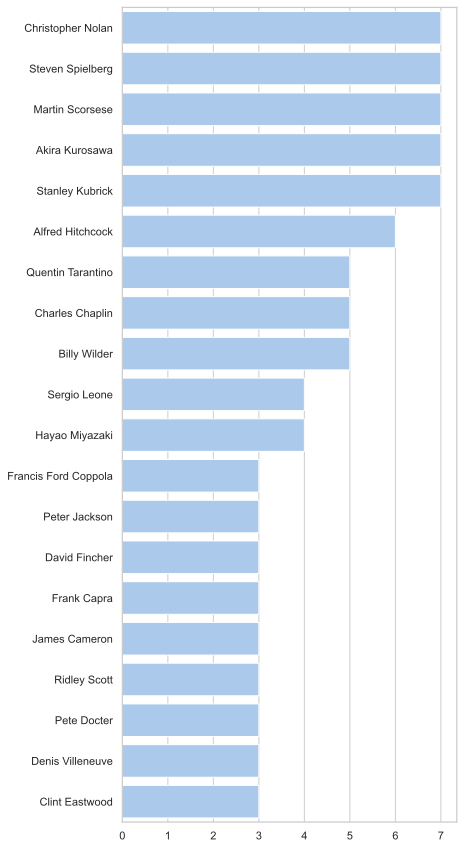

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=number_of_films, y= direct,
            label="Total", color="b")

# ЗАДАЧА 3

# ЗАДАЧА 4

In [63]:
data.year.describe()

count      250
unique      86
top       1995
freq         8
Name: year, dtype: object

<AxesSubplot:title={'center':'Top films, years'}, ylabel='Frequency'>

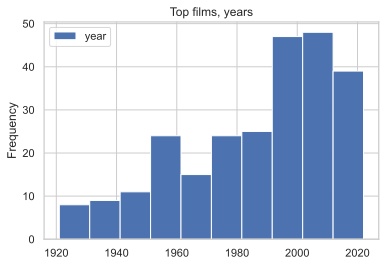

In [66]:
data["year"] = data["year"].astype(float)
data.plot.hist(x = "movies", y = "year", title='Top films, years')

# ЗАДАЧА 5

In [65]:
data.ratings.describe()

count                   250
unique                  250
top       8.230117088018073
freq                      1
Name: ratings, dtype: object

<AxesSubplot:title={'center':'Top films, rating'}, ylabel='Frequency'>

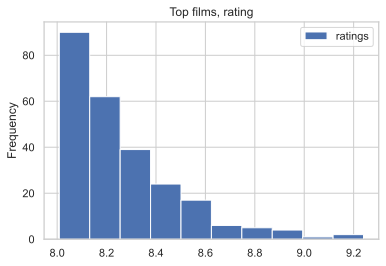

In [67]:
data["ratings"] = pd.to_numeric(data["ratings"])

data.plot.hist(x = "movies", y = "ratings", title='Top films, rating')

# ЗАДАЧА 6

In [68]:
links_list = data["links"].tolist()
imdb = "http://www.imdb.com"
full_links_list = [imdb + x for x in links_list]

In [69]:
description_list = []

In [70]:
def get_description(link):
    html_text = requests.get(link).text
    soup = BeautifulSoup(html_text, 'lxml')
    return soup.find_all(attrs={"name": "description"})[0].get("content")

In [71]:
for i in full_links_list:
    description_list.append(get_description(i))

In [72]:
data["description"] = description_list
data.head()

,movies,ratings,crew,links,title,year,description
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.240019,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994.0,Побег из Шоушенка: Directed by Frank Darabont....
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.161078,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972.0,Крёстный отец: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.994024,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008.0,Темный рыцарь: Directed by Christopher Nolan. ...
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.990207,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974.0,Крёстный отец 2: Directed by Francis Ford Copp...
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.950842,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957.0,12 рaзгневанных мужчин: Directed by Sidney Lum...


# ЗАДАЧА 7

In [73]:
descr = data["description"].tolist()

In [74]:
descr

['Побег из Шоушенка: Directed by Frank Darabont. With Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler. Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Крёстный отец: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.',
 'Темный рыцарь: Directed by Christopher Nolan. With Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine. When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.',
 'Крёстный отец 2: Directed by Francis Ford Coppola. With Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro. The early life and career of Vito Corleone in 1920s New York City is portrayed, 

In [75]:
actors = re.findall(r'(?<=With )[^.]+', str(descr))

In [76]:
list_a = actors
list_b = [ x for x in list_a if len(x) > 2  and len(x) < 123 ]
list_b 

['Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 'Marlon Brando, Al Pacino, James Caan, Richard S',
 'Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine',
 'Al Pacino, Robert Duvall, Diane Keaton, Robert De Niro',
 'Martin Balsam, John Fiedler, Lee J',
 'Liam Neeson, Ben Kingsley, Ralph Fiennes, Caroline Goodall',
 'Noel Appleby, Ali Astin, Sean Astin, David Aston',
 'Tim Roth, Amanda Plummer, Laura Lovelace, John Travolta',
 'Alan Howard, Noel Appleby, Sean Astin, Sala Baker',
 'Eli Wallach, Clint Eastwood, Lee Van Cleef, Aldo Giuffrè',
 'Tom Hanks, Rebecca Williams, Sally Field, Michael Conner Humphreys',
 'Edward Norton, Brad Pitt, Meat Loaf, Zach Grenier',
 'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page, Tom Hardy',
 'Bruce Allpress, Sean Astin, John Bach, Sala Baker',
 'Mark Hamill, Harrison Ford, Carrie Fisher, Billy Dee Williams',
 'Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving',
 'Robert De Niro, Ray Liotta, Joe Pesci, Lorraine Brac

In [77]:
data["actors"] = list_b
data.head()

,movies,ratings,crew,links,title,year,description,actors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.240019,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994.0,Побег из Шоушенка: Directed by Frank Darabont....,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.161078,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972.0,Крёстный отец: Directed by Francis Ford Coppol...,"Marlon Brando, Al Pacino, James Caan, Richard S"
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.994024,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008.0,Темный рыцарь: Directed by Christopher Nolan. ...,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.990207,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974.0,Крёстный отец 2: Directed by Francis Ford Copp...,"Al Pacino, Robert Duvall, Diane Keaton, Robert..."
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.950842,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957.0,12 рaзгневанных мужчин: Directed by Sidney Lum...,"Martin Balsam, John Fiedler, Lee J"


добавить актеров получилось ко всем фильмам

# ЗАДАЧА 8

In [78]:
user_ratings_list = []
user_ratings_strings = soup.find_all(attrs={'class': 'ratingColumn imdbRating'})
for u in user_ratings_strings:
    a = u.strong["title"]
  #selecting user ratings number from a string
    idx_start = a.find("based on ") + len("based on ")
    idx_end = a.find(" user ratings")
    a = a[idx_start:idx_end]
    user_ratings_list.append(a)

In [79]:
data_with_user_rating = data.copy()
data_with_user_rating["user_ratings"] = user_ratings_list

In [80]:
data_with_user_rating['user_ratings'].describe()

count         250
unique        250
top       724,600
freq            1
Name: user_ratings, dtype: object

In [81]:
data_with_user_rating['user_ratings'] = data_with_user_rating['user_ratings'].str.replace(',', '').astype(int)

In [82]:
data_with_user_rating.head()

,movies,ratings,crew,links,title,year,description,actors,user_ratings
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.240019,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994.0,Побег из Шоушенка: Directed by Frank Darabont....,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",2564998
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.161078,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972.0,Крёстный отец: Directed by Francis Ford Coppol...,"Marlon Brando, Al Pacino, James Caan, Richard S",1765428
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.994024,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008.0,Темный рыцарь: Directed by Christopher Nolan. ...,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",2527732
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.990207,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974.0,Крёстный отец 2: Directed by Francis Ford Copp...,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",1221976
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.950842,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957.0,12 рaзгневанных мужчин: Directed by Sidney Lum...,"Martin Balsam, John Fiedler, Lee J",757625


In [95]:
data_with_user_rating = data_with_user_rating.nlargest(10, "user_ratings")
(data_with_user_rating[["title", "user_ratings"]])

,title,user_ratings
0,Побег из Шоушенка,2564998
2,Темный рыцарь,2527732
12,Начало,2251348
11,Бойцовский клуб,2018338
10,Форрест Гамп,1978590
7,Криминальное чтиво,1969425
15,Матрица,1846853
8,Властелин колец: Братство кольца,1786948
1,Крёстный отец,1765428
6,Властелин колец: Возвращение короля,1765191


# Задача 9

In [84]:
title_list = data["title"].to_list()

In [85]:
title_description_list = title_list + description_list

In [86]:
from collections import Counter

In [87]:
def top_10_words (list):
  tokenized = ' '.join(list).lower().split()
  counter = Counter (tokenized)
  most_occur = counter.most_common(10)
  return most_occur

In [88]:
top_10_words(title_list)

[('в', 11),
 ('и', 9),
 ('на', 8),
 ('отец', 4),
 ('по', 4),
 ('властелин', 3),
 ('колец:', 3),
 ('звёздные', 3),
 ('войны.', 3),
 ('эпизод', 3)]

In [89]:
top_10_words(description_list)

[('a', 388),
 ('the', 362),
 ('with', 312),
 ('by', 294),
 ('directed', 250),
 ('to', 234),
 ('of', 205),
 ('and', 175),
 ('in', 150),
 ('his', 146)]

In [90]:
top_10_words(title_description_list)

[('a', 389),
 ('the', 365),
 ('with', 312),
 ('by', 294),
 ('directed', 250),
 ('to', 237),
 ('of', 206),
 ('and', 175),
 ('in', 150),
 ('his', 146)]

# ЗАДАЧА 10